# DATA ANALYSIS FOR MOVIELENS 20M

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pltd
import seaborn as sns

In [12]:
dataset_path = "datasets/movielens_20m/ml-20m/"
movies_csv = pd.read_csv(dataset_path+'movies.csv')
ratings_csv = pd.read_csv(dataset_path+'ratings.csv',sep=',')

In [19]:
movies_csv.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [20]:
ratings_csv.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [21]:
print("Movies shape = ", movies_csv.shape)
print("Unique items = ", len(movies_csv['movieId'].unique().tolist()))
print("--------------------------------")
print("Ratings shape = ", ratings_csv.shape)
print("Minimum rating given to a movie = ", ratings_csv['rating'].min())
print("Maximum rating given to a movie = ", ratings_csv['rating'].max())

Movies shape =  (27278, 3)
Unique items =  27278
--------------------------------
Ratings shape =  (20000263, 4)
Minimum rating given to a movie =  0.5
Maximum rating given to a movie =  5.0


## Merging two dataframes "movies.csv" and "ratings.csv"

In [16]:
data=movies_csv.merge(ratings_csv,on = 'movieId',how = 'inner')
print(data.head(3))

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,944919407
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0,858275452
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,833981871


In [24]:
print("Unique genre = ", len(data['genres'].unique().tolist()))
print("Max rated movies = ", data.groupby('title').size().sort_values(ascending=False)[0])
print("Min rated movies = ", data.groupby('title').size().sort_values(ascending=True)[0])

Unique genre =  1329
Max rated movies =  67310
Min rated movies =  1


In [25]:
# Extract year from title
data['year'] =data['title'].str.extract('.*\((.*)\).*',expand = False)
data.head(3)

,movieId,title,genres,userId,rating,timestamp,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,944919407,1995
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0,858275452,1995
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,833981871,1995
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0,943497887,1995
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,1230858821,1995


## Counts the number of times each genre appear

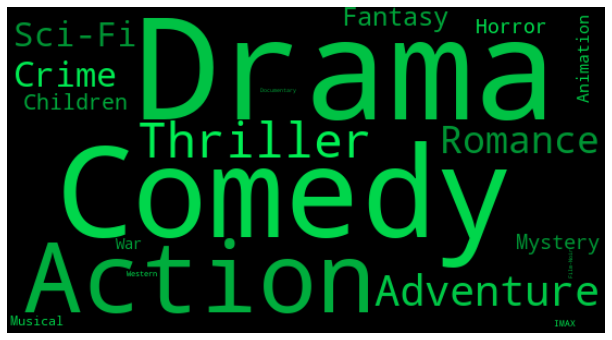

In [27]:
from wordcloud import WordCloud, STOPWORDS #used to generate world cloud
import matplotlib.pyplot as plt # data visualization library

#define a function that counts the number of times each genre appear:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue
        for s in liste_keywords: 
            if pd.notnull(s): keyword_count[s] += 1
    # convert the dictionary in a list to sort the keywords  by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

#here we  make census of the genres:
genre_labels = set()
for s in data['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))
    
#counting how many times each of genres occur:
keyword_occurences, dum = count_word(data, 'genres', genre_labels)

# Function that control the color of the words
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)


#Finally, the result is shown as a wordcloud:
words = dict()
trunc_occurences = keyword_occurences[0:50]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 100 # define the color of the words
f, ax = plt.subplots(figsize=(14, 6))
wordcloud = WordCloud(width=550,height=300, background_color='black', 
                      max_words=1628,relative_scaling=0.7,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

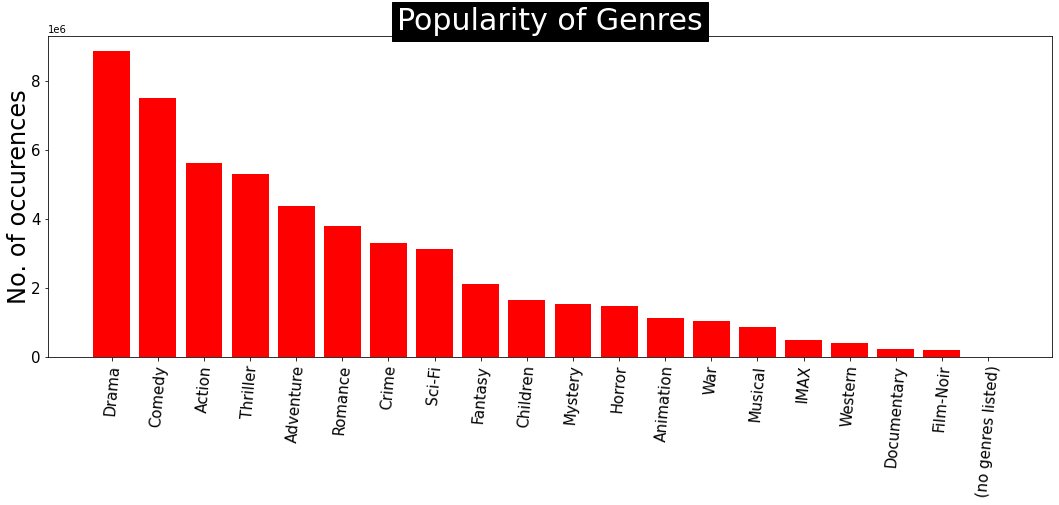

In [28]:
# lets display the same result in the histogram
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [i[1] for i in trunc_occurences]
x_axis = [k for k,i in enumerate(trunc_occurences)]
x_label = [i[0] for i in trunc_occurences]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()